In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pickle.load(open('./sps_spotinfo_df.pkl', 'rb'))

# frequency score mapping
frequency_map = {'<5%': 5, '5-10%': 4, '10-15%': 3, '15-20%': 2, '>20%': 1}
data = data.replace({'Frequency': frequency_map})

In [4]:
def time_vis(instance, az):
    condition = ((data['InstanceType'] == instance)&
                 (data['AvailabilityZoneId'] == az))
    cond_df = data[condition].reset_index()
    if len(cond_df) == 0:
        print("Condition Error!")
        return 0

    fig, ax1 = plt.subplots()    
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    ax1.plot(cond_df['Score'], label='SPS', color='tab:orange')
    ax1.set_ylim((0, 4))
    ax1.set_ylabel('SPS')
    
    ax2 = ax1.twinx()
    ax2.plot(cond_df['Price'], label='Price', color='tab:blue')
    
    ax3 = ax1.twinx()
    ax3.plot(cond_df['Frequency'], label='FS', color='tab:green')
    ax3.set_ylim((0, 6))
    ax3.set_ylabel('\n\nPrice & FS')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3,fontsize=10, loc=5)
    
    plt.show()

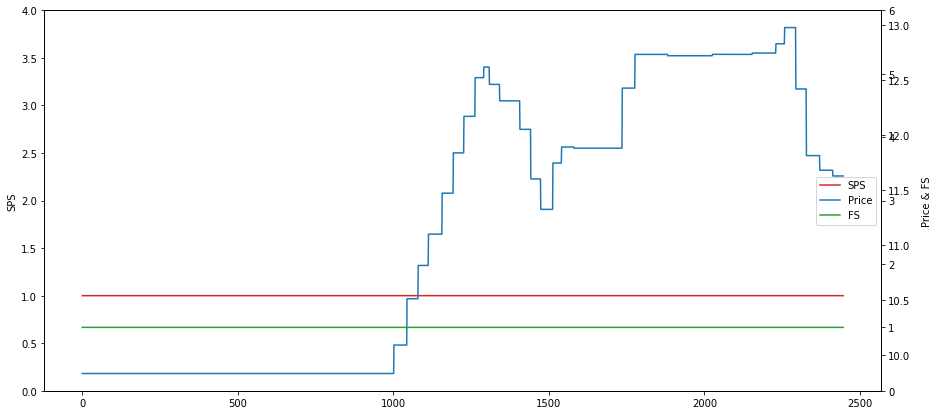

In [5]:
time_vis('p4d.24xlarge', 'use1-az1')

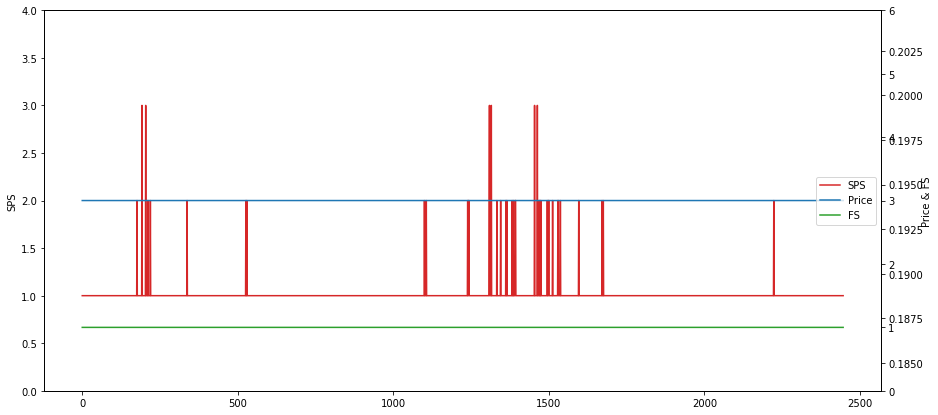

In [6]:
time_vis('g4dn.xlarge', 'apne2-az1')